# Importing Libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['aqi_data_CONFIG_DIR'] = "/content/gdrive/My Drive/aqi_data"

In [ ]:
%cd /content/gdrive/My Drive/aqi_data

/content/gdrive/My Drive/aqi_data


In [ ]:
df = pd.read_csv('city_day.csv',encoding='unicode_escape')

In [ ]:
df1 = df 
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# General Information about the dataset

In [ ]:
# no. of rows and columns
df.shape

(29531, 16)

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#from datetime import datetime
#print('Date starts from {}, and ends in {}'.format(df['Date'].min().strftime('%Y-%m-%d'), df['Date'].max().strftime('%Y-%m-%d')))


In [ ]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

# DATA PREPROCESSING

# Handling the Missing Values 

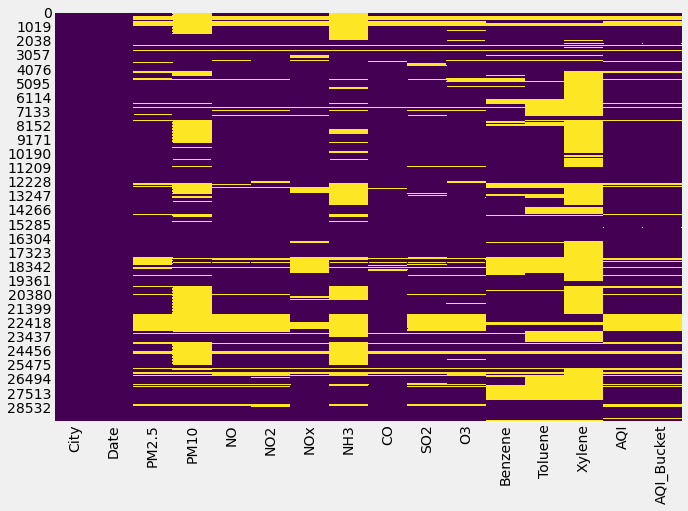

In [ ]:
# heatmap implemented through seaborn library
# Missing values in each column/attribute are shown in yellow color
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar = False, cmap='viridis')

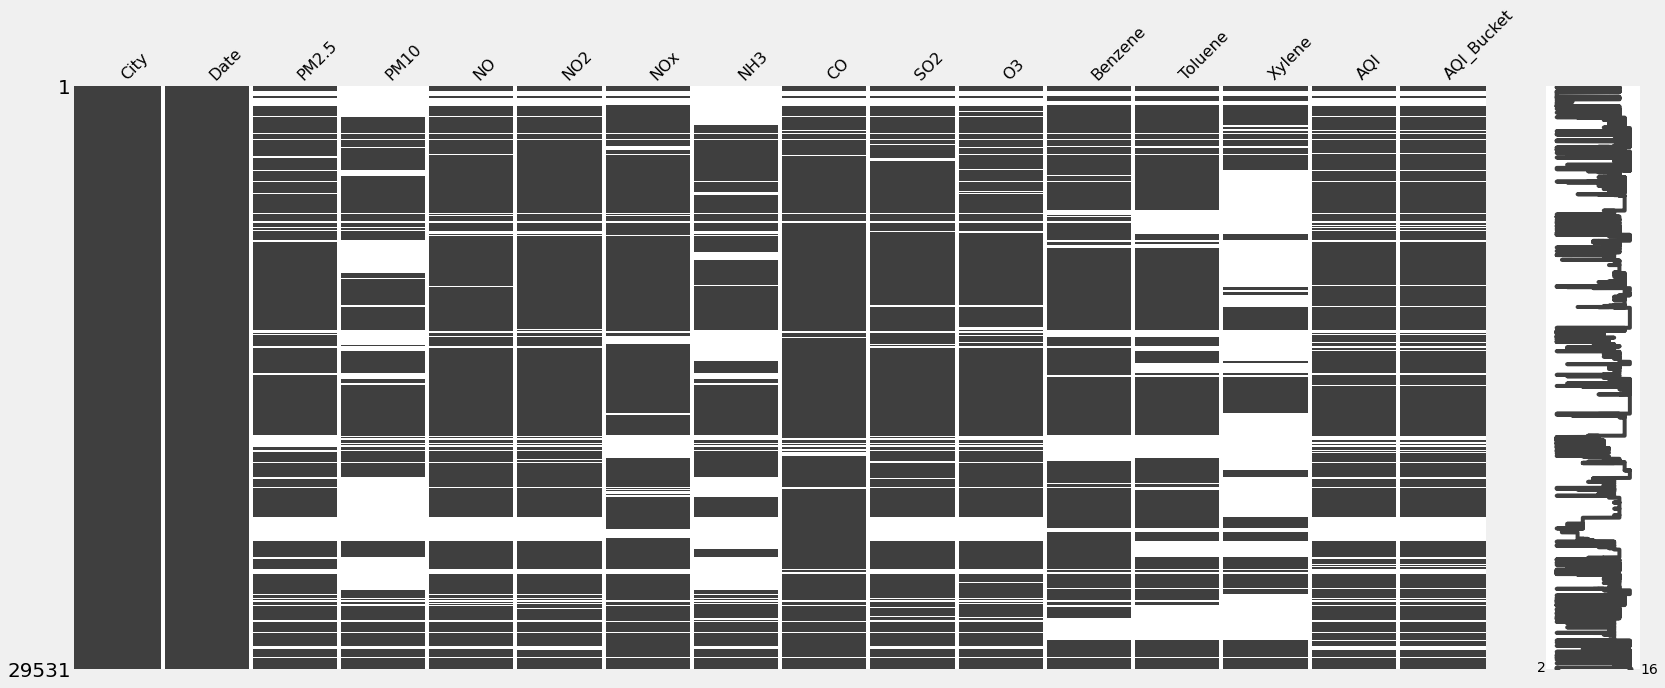

In [ ]:
# Missingno is a Python library that provides the ability to understand the distribution of missing values through informative
# visualizations.
from missingno import matrix
matrix(df)

In [ ]:
# DataFrame.isnull().sum() is the method to get missing values in numbers of perticular dataframe. !!!
# Total number of missing values in each column
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
# Replcaing the missing values through linear inter-polation method
df.interpolate(limit_direction="both",inplace=True)
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [ ]:
# grouping the dataframe according to the cities
dfcopy = df.groupby(['City'])

# creating the list of all the names of the cities in the dataset
city_names = df['City'].unique()
city_names = city_names.tolist()

In [ ]:
# Since the AQI_Bucket has categorical values, so we'll replace them by frequency count method w.r.t each city
# A city having maximum count of AQI_Bucket value will be inserted for the NaN values for that city in AQI_Bucket.
# For eg--> suppose Ahmedabad has maximum count of say 'Severe', for the city Ahmedabad, NaN values for AQI_Bucket will be
#           replaced with 'Severe'.

for city in city_names:
    x = dfcopy['AQI_Bucket'].value_counts().loc[city].index[0]  # index 0 because the values will be ordered in descending order
    filt = df['City'] == city
    index = df[filt].index

    df.loc[index[0]:index[len(index)-1], 'AQI_Bucket'].fillna(x, inplace = True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Severe
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Severe
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Severe
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Severe
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# Now AQI_Bucket has 0 null values
df['AQI_Bucket'].isnull().sum()

0

# Checking for outliers

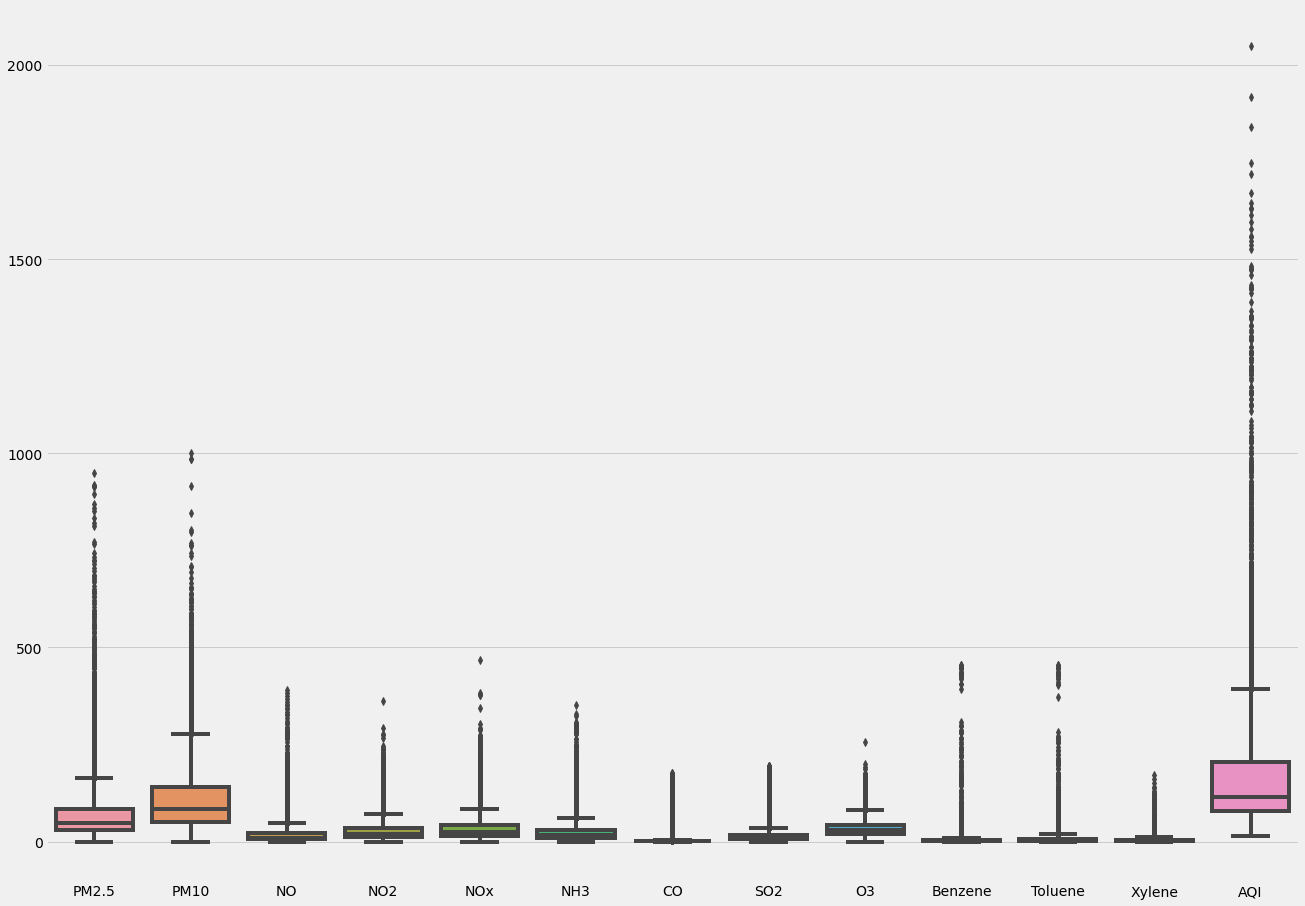

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

# OBSERVATIONS :-
# Here we can observe that outliers are there in the feature variable, so we'll just ignore it for now.
# Because temperature variations could also be possible 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Under-Sampling and KNN Classification over undersampled data


In [ ]:
from imblearn.under_sampling import NearMiss
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["City","Date","AQI_Bucket"]]
target = "AQI_Bucket"
# Define a random state 
#state = np.random.RandomState(1)
X = df[columns]
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nm = NearMiss(version=1)
X_res,Y_res = nm.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


(22148, 13) (7383, 13) (22148,) (7383,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_res.shape, Y_res.shape

((6510, 13), (6510,))

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_res,Y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.69      0.87      0.77       363
    Moderate       0.57      0.67      0.61      2751
        Poor       0.39      0.77      0.52       703
Satisfactory       0.95      0.37      0.53      2492
      Severe       0.78      0.97      0.86       502
   Very Poor       0.70      0.85      0.76       572

    accuracy                           0.62      7383
   macro avg       0.68      0.75      0.68      7383
weighted avg       0.71      0.62      0.61      7383

[[ 315    3    0   44    1    0]
 [  19 1836  809    5   42   40]
 [   0    0  538    0    9  156]
 [ 125 1406   26  921    3   11]
 [   0    0    7    0  489    6]
 [   0    0    0    0   86  486]]


In [ ]:
knn_classifier.score(X_test,y_test)

0.6210212650684004

In [ ]:
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average='macro'))

[0.68627451 0.56579353 0.38985507 0.94948454 0.77619048 0.69527897]
0.6771461821671858


In [ ]:
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average='macro'))

[0.8677686  0.66739368 0.76529161 0.36958266 0.97410359 0.84965035]
0.7489650795499435


Text(40.1, 0.5, 'Truth')

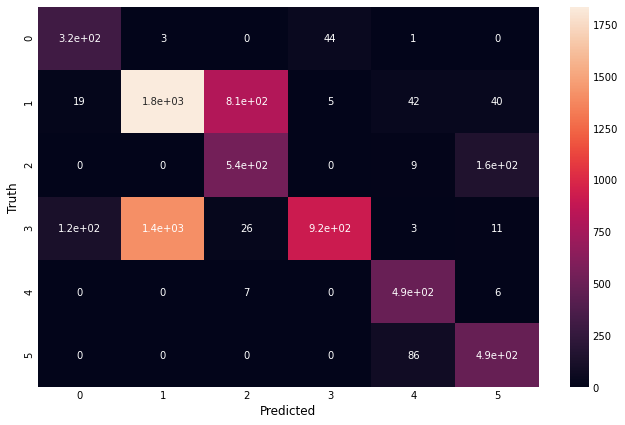

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
conf_mat1 = confusion_matrix(y_test, y_pred)
sn.heatmap(conf_mat1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Over-Sampling and KNN Classification on oversampled Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

X_train_res, y_train_res = os.fit_sample(X_train, y_train)

X_train_res.shape,y_train_res.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((48702, 13), (48702,))

In [ ]:
knn_classifier_1 = KNeighborsClassifier(n_neighbors=5)
knn_classifier_1.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = knn_classifier_1.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

        Good       0.76      0.94      0.84       363
    Moderate       0.94      0.90      0.92      2751
        Poor       0.81      0.89      0.85       703
Satisfactory       0.93      0.91      0.92      2492
      Severe       0.93      0.94      0.94       502
   Very Poor       0.85      0.90      0.87       572

    accuracy                           0.90      7383
   macro avg       0.87      0.91      0.89      7383
weighted avg       0.91      0.90      0.91      7383

[[ 340    0    0   23    0    0]
 [  10 2468   94  144   12   23]
 [   1   30  627    1    5   39]
 [  96  122    9 2261    1    3]
 [   0    1    6    0  471   24]
 [   0    2   40    0   16  514]]


In [ ]:
knn_classifier_1.score(X_test,y_test)

0.9049167005282406

In [ ]:
print(precision_score(y_test, y_pred2, average=None))
print(precision_score(y_test, y_pred2, average='macro'))

[0.7606264  0.94090736 0.80798969 0.93083573 0.93267327 0.85240464]
0.8709061820942413


In [ ]:
print(recall_score(y_test, y_pred2, average=None))
print(recall_score(y_test, y_pred2, average='macro'))

[0.93663912 0.89712832 0.89189189 0.90730337 0.93824701 0.8986014 ]
0.9116351847774906


Text(40.1, 0.5, 'Truth')

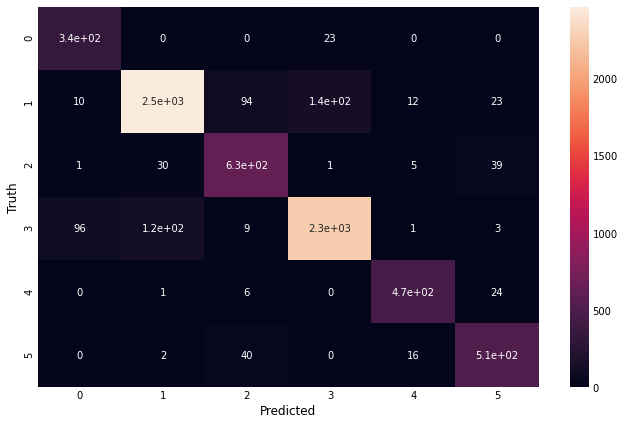

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
conf_mat = confusion_matrix(y_test, y_pred2)
sn.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K-Fold (k=10) Cross Validation
KNN Classification with undersampling

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.36      0.99      0.53       177
    Moderate       0.22      0.29      0.25       413
        Poor       0.18      0.35      0.24       285
Satisfactory       0.31      0.43      0.36       542
      Severe       1.00      0.40      0.58      1313
   Very Poor       0.14      0.06      0.08       224

    accuracy                           0.40      2954
   macro avg       0.37      0.42      0.34      2954
weighted avg       0.58      0.40      0.42      2954



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.66      0.81      0.73       248
    Moderate       0.49      0.80      0.61      1039
        Poor       0.26      0.81      0.39       103
Satisfactory       0.92      0.33      0.48      1504
      Severe       0.37      1.00      0.54         7
   Very Poor       0.63      0.94      0.75        52

    accuracy                           0.56      2953
   macro avg       0.55      0.78      0.58      2953
weighted avg       0.72      0.56      0.55      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.35      0.90      0.50        87
    Moderate       0.64      0.68      0.66      1420
        Poor       0.34      0.83      0.48       254
Satisfactory       0.96      0.38      0.54      1133
      Severe       0.35      1.00      0.52         6
   Very Poor       0.37      0.96      0.53        53

    accuracy                           0.59      2953
   macro avg       0.50      0.79      0.54      2953
weighted avg       0.72      0.59      0.59      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.24      0.80      0.37        71
    Moderate       0.42      0.62      0.50       669
        Poor       0.58      0.72      0.64       492
Satisfactory       0.96      0.29      0.45      1045
      Severe       0.69      0.94      0.80       213
   Very Poor       0.74      0.83      0.78       463

    accuracy                           0.58      2953
   macro avg       0.61      0.70      0.59      2953
weighted avg       0.70      0.58      0.57      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.52      0.88      0.66       137
    Moderate       0.66      0.50      0.57      1188
        Poor       0.41      0.70      0.52       468
Satisfactory       0.79      0.29      0.42       565
      Severe       0.54      0.94      0.68       127
   Very Poor       0.68      0.88      0.77       468

    accuracy                           0.59      2953
   macro avg       0.60      0.70      0.60      2953
weighted avg       0.64      0.59      0.57      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.90      0.90      0.90       145
    Moderate       0.66      0.73      0.70      1607
        Poor       0.26      0.88      0.40       164
Satisfactory       0.96      0.39      0.56      1012
      Severe       0.35      1.00      0.52         8
   Very Poor       0.41      0.82      0.55        17

    accuracy                           0.63      2953
   macro avg       0.59      0.79      0.60      2953
weighted avg       0.75      0.63      0.64      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.53      0.86      0.65       140
    Moderate       0.66      0.55      0.60      1422
        Poor       0.34      0.74      0.47       350
Satisfactory       0.88      0.30      0.45       651
      Severe       0.49      0.99      0.65       100
   Very Poor       0.69      0.84      0.76       290

    accuracy                           0.58      2953
   macro avg       0.60      0.71      0.60      2953
weighted avg       0.66      0.58      0.57      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.74      0.93      0.82        15
    Moderate       0.17      0.58      0.27       521
        Poor       0.49      0.84      0.62       252
Satisfactory       1.00      0.22      0.35      1840
      Severe       0.62      1.00      0.77        41
   Very Poor       0.86      0.92      0.89       284

    accuracy                           0.42      2953
   macro avg       0.65      0.75      0.62      2953
weighted avg       0.79      0.42      0.42      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.75      0.81      0.78       246
    Moderate       0.75      0.51      0.61      1380
        Poor       0.32      0.78      0.46       312
Satisfactory       0.56      0.29      0.39       385
      Severe       0.55      0.97      0.70       196
   Very Poor       0.77      0.79      0.78       434

    accuracy                           0.61      2953
   macro avg       0.62      0.69      0.62      2953
weighted avg       0.67      0.61      0.61      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

        Good       0.59      0.90      0.71       182
    Moderate       0.64      0.83      0.72      1209
        Poor       0.29      0.65      0.40       111
Satisfactory       0.95      0.51      0.66      1397
      Severe       0.33      1.00      0.50         2
   Very Poor       0.57      1.00      0.73        52

    accuracy                           0.68      2953
   macro avg       0.56      0.81      0.62      2953
weighted avg       0.77      0.68      0.68      2953



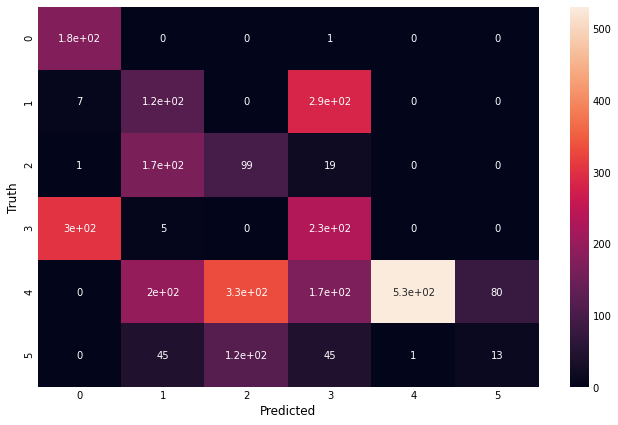

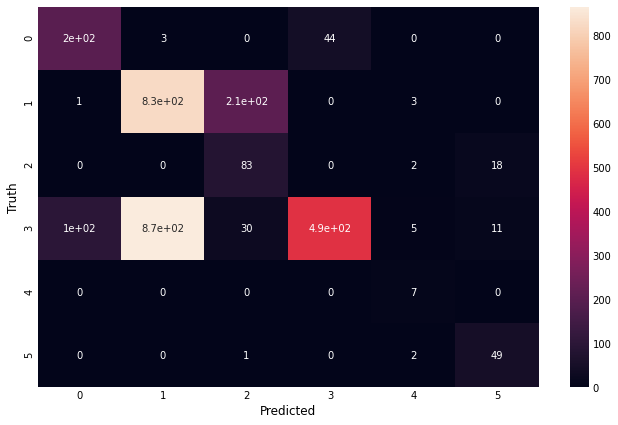

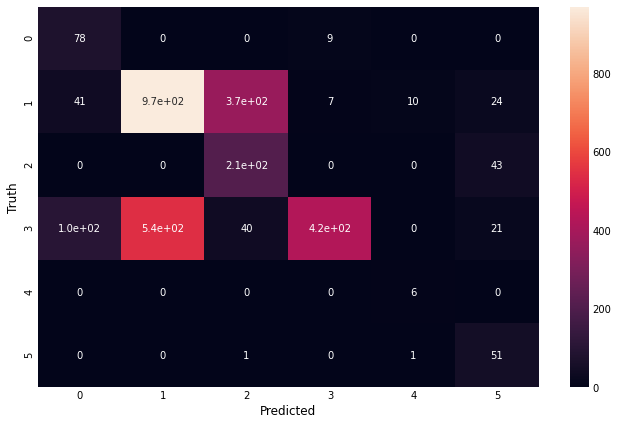

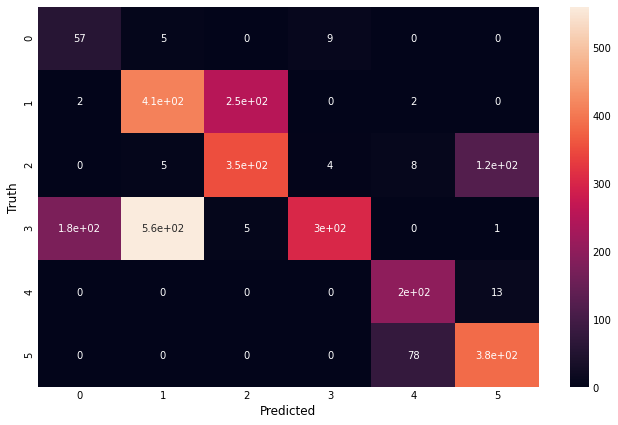

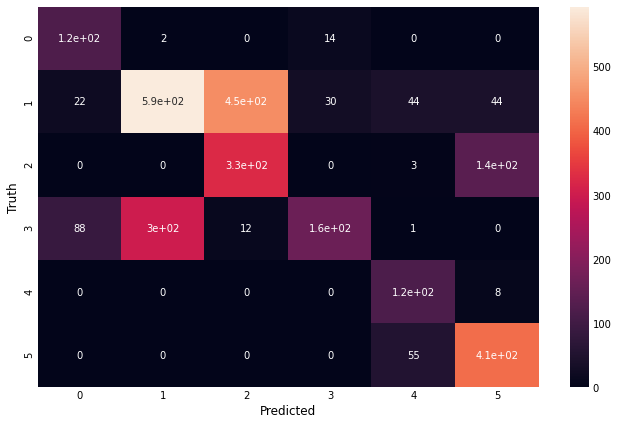

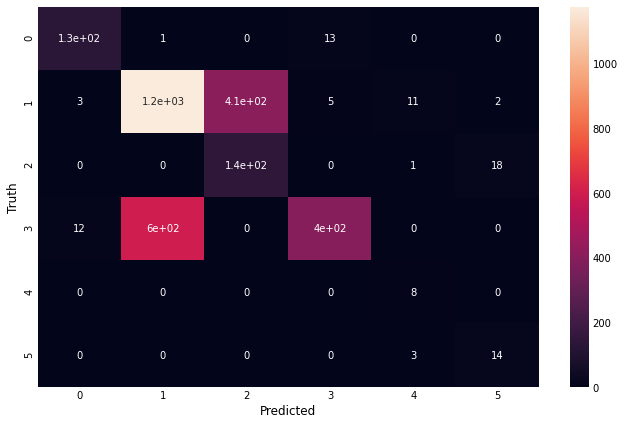

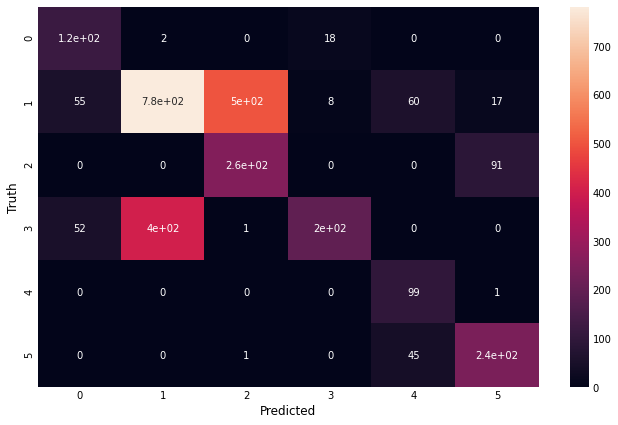

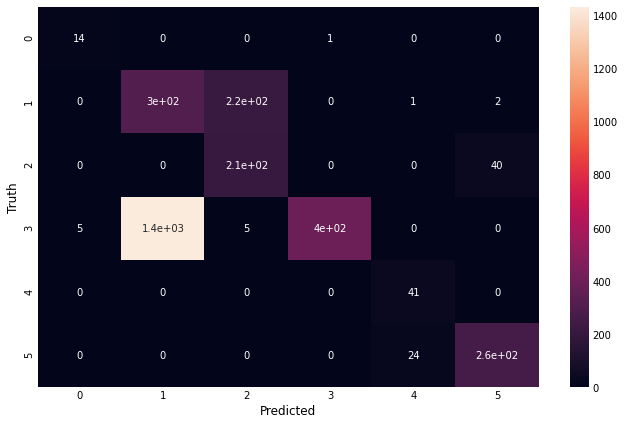

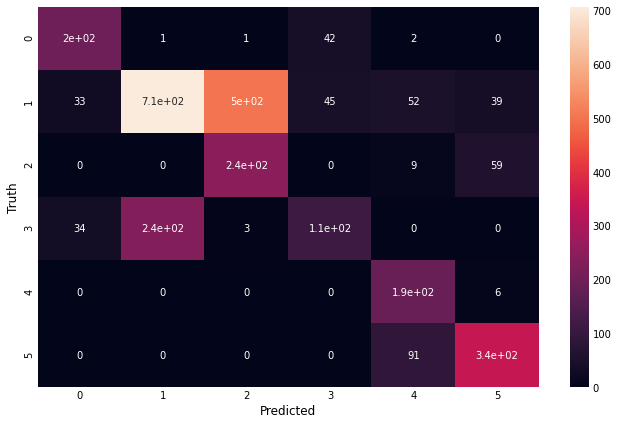

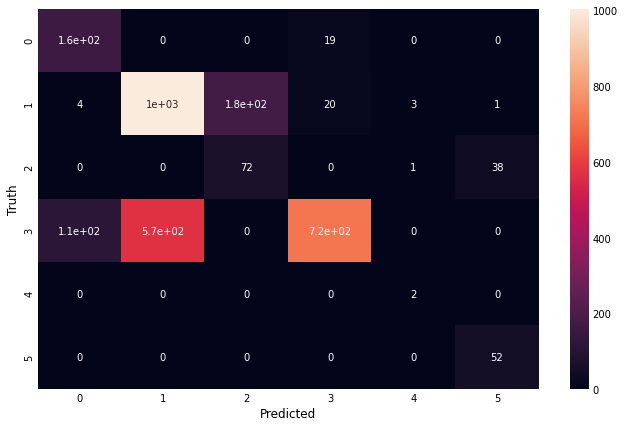

In [ ]:
kf = KFold(n_splits=10)
accuracy = []
precision = []
recall = []
precision_avg = []
recall_avg = []

for train_index, test_index in kf.split(X, Y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]    
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
    Xtrain, ytrain = nm.fit_resample(X1_train, Y1_train)
    knn_classifier.fit(Xtrain, ytrain)
    ypred = knn_classifier.predict(X1_test)
    accuracy.append(accuracy_score(Y1_test, ypred))
    precision.append(precision_score(Y1_test, ypred,average=None))
    recall.append(recall_score(Y1_test, ypred,average=None))
    precision_avg.append(precision_score(Y1_test, ypred,average='macro'))
    recall_avg.append(recall_score(Y1_test, ypred,average='macro'))
    print(classification_report(Y1_test, ypred))
    
    cmrfs = confusion_matrix(Y1_test, ypred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cmrfs, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [ ]:
precision

[array([0.3613963 , 0.22429907, 0.17934783, 0.30993377, 0.9981203 ,
        0.13978495]),
 array([0.66336634, 0.48791986, 0.25856698, 0.91775701, 0.36842105,
        0.62820513]),
 array([0.34821429, 0.64129715, 0.33977456, 0.96371882, 0.35294118,
        0.36690647]),
 array([0.24255319, 0.42014242, 0.57937807, 0.95886076, 0.69444444,
        0.74038462]),
 array([0.52380952, 0.66220736, 0.41235813, 0.78743961, 0.53603604,
        0.68490879]),
 array([0.89726027, 0.66160764, 0.26173285, 0.95683453, 0.34782609,
        0.41176471]),
 array([0.52863436, 0.65851602, 0.33989501, 0.88235294, 0.48529412,
        0.69121813]),
 array([0.73684211, 0.17443869, 0.49074074, 0.99748111, 0.62121212,
        0.86092715]),
 array([0.74906367, 0.75      , 0.32490013, 0.565     , 0.55232558,
        0.76733781]),
 array([0.58844765, 0.63705584, 0.28915663, 0.94827586, 0.33333333,
        0.57142857])]

In [ ]:
recall

[array([0.99435028, 0.2905569 , 0.34736842, 0.43173432, 0.40441736,
        0.05803571]),
 array([0.81048387, 0.79692012, 0.80582524, 0.32646277, 1.        ,
        0.94230769]),
 array([0.89655172, 0.68239437, 0.83070866, 0.37511033, 1.        ,
        0.96226415]),
 array([0.8028169 , 0.61733931, 0.7195122 , 0.28995215, 0.93896714,
        0.83153348]),
 array([0.88321168, 0.5       , 0.69871795, 0.28849558, 0.93700787,
        0.88247863]),
 array([0.90344828, 0.73242066, 0.88414634, 0.39426877, 1.        ,
        0.82352941]),
 array([0.85714286, 0.54922644, 0.74      , 0.29953917, 0.99      ,
        0.84137931]),
 array([0.93333333, 0.5815739 , 0.84126984, 0.21521739, 1.        ,
        0.91549296]),
 array([0.81300813, 0.51304348, 0.78205128, 0.29350649, 0.96938776,
        0.79032258]),
 array([0.8956044 , 0.83043838, 0.64864865, 0.51181102, 1.        ,
        1.        ])]

In [ ]:
precision_avg

[0.36881370287197174,
 0.5540393939305442,
 0.5021420782058453,
 0.6059605834519297,
 0.601126575714612,
 0.5895043493192292,
 0.5976517639546786,
 0.6469403192063831,
 0.6181045320948984,
 0.5612829807216583]

In [ ]:
recall_avg

[0.42107716678453194,
 0.7803332812411661,
 0.7911715382104116,
 0.700020195919846,
 0.6983186182109474,
 0.7896355772346557,
 0.7128812966043503,
 0.7478145700011948,
 0.693553286607858,
 0.8144170744500946]

In [ ]:
accuracy

[0.3970886932972241,
 0.5618015577378936,
 0.5892312902133424,
 0.5797494073823231,
 0.5882153741957331,
 0.6346088723332205,
 0.5750084659668134,
 0.4151710125296309,
 0.6088723332204538,
 0.6799864544530986]

KNN Classification with oversampled data

In [ ]:
knn_classifier_1 = KNeighborsClassifier(n_neighbors=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.68      0.98      0.80       177
    Moderate       0.74      0.90      0.81       413
        Poor       0.39      0.95      0.55       285
Satisfactory       0.94      0.78      0.86       542
      Severe       1.00      0.42      0.59      1313
   Very Poor       0.33      0.74      0.45       224

    accuracy                           0.66      2954
   macro avg       0.68      0.79      0.68      2954
weighted avg       0.82      0.66      0.67      2954



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.78      0.92      0.84       248
    Moderate       0.88      0.93      0.91      1039
        Poor       0.63      0.89      0.74       103
Satisfactory       0.95      0.85      0.90      1504
      Severe       0.70      1.00      0.82         7
   Very Poor       0.77      0.85      0.81        52

    accuracy                           0.89      2953
   macro avg       0.79      0.91      0.84      2953
weighted avg       0.90      0.89      0.89      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.70      0.90      0.78        87
    Moderate       0.91      0.80      0.85      1420
        Poor       0.62      0.91      0.73       254
Satisfactory       0.85      0.86      0.85      1133
      Severe       0.67      0.33      0.44         6
   Very Poor       0.57      0.74      0.64        53

    accuracy                           0.83      2953
   macro avg       0.72      0.76      0.72      2953
weighted avg       0.85      0.83      0.84      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.59      0.92      0.72        71
    Moderate       0.86      0.87      0.87       669
        Poor       0.87      0.90      0.89       492
Satisfactory       0.93      0.88      0.91      1045
      Severe       0.91      0.72      0.81       213
   Very Poor       0.84      0.89      0.86       463

    accuracy                           0.87      2953
   macro avg       0.83      0.86      0.84      2953
weighted avg       0.88      0.87      0.88      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.72      0.93      0.82       137
    Moderate       0.92      0.79      0.85      1188
        Poor       0.79      0.89      0.84       468
Satisfactory       0.80      0.83      0.81       565
      Severe       0.78      0.77      0.78       127
   Very Poor       0.82      0.91      0.86       468

    accuracy                           0.84      2953
   macro avg       0.81      0.85      0.83      2953
weighted avg       0.84      0.84      0.84      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.73      0.97      0.83       145
    Moderate       0.95      0.95      0.95      1607
        Poor       0.88      0.95      0.91       164
Satisfactory       0.93      0.88      0.90      1012
      Severe       1.00      1.00      1.00         8
   Very Poor       0.82      0.82      0.82        17

    accuracy                           0.92      2953
   macro avg       0.88      0.93      0.90      2953
weighted avg       0.93      0.92      0.93      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.65      0.92      0.77       140
    Moderate       0.92      0.78      0.84      1422
        Poor       0.76      0.90      0.82       350
Satisfactory       0.74      0.78      0.76       651
      Severe       0.68      0.77      0.72       100
   Very Poor       0.78      0.94      0.85       290

    accuracy                           0.81      2953
   macro avg       0.76      0.85      0.79      2953
weighted avg       0.83      0.81      0.82      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.50      0.93      0.65        15
    Moderate       0.61      0.86      0.71       521
        Poor       0.81      0.88      0.85       252
Satisfactory       0.99      0.84      0.91      1840
      Severe       0.90      0.90      0.90        41
   Very Poor       0.91      0.98      0.95       284

    accuracy                           0.86      2953
   macro avg       0.79      0.90      0.83      2953
weighted avg       0.89      0.86      0.87      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.89      0.83      0.86       246
    Moderate       0.91      0.70      0.79      1380
        Poor       0.56      0.90      0.69       312
Satisfactory       0.59      0.72      0.65       385
      Severe       0.76      0.81      0.79       196
   Very Poor       0.82      0.90      0.86       434

    accuracy                           0.77      2953
   macro avg       0.76      0.81      0.77      2953
weighted avg       0.81      0.77      0.78      2953



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        Good       0.51      0.96      0.67       182
    Moderate       0.95      0.87      0.90      1209
        Poor       0.82      0.87      0.84       111
Satisfactory       0.89      0.85      0.87      1397
      Severe       1.00      0.50      0.67         2
   Very Poor       0.85      0.90      0.88        52

    accuracy                           0.86      2953
   macro avg       0.84      0.82      0.80      2953
weighted avg       0.89      0.86      0.87      2953



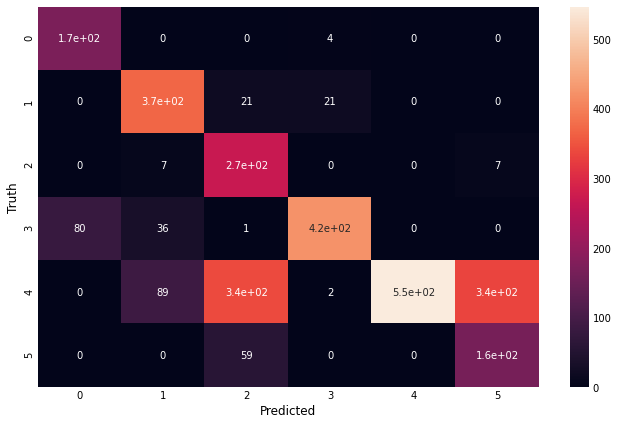

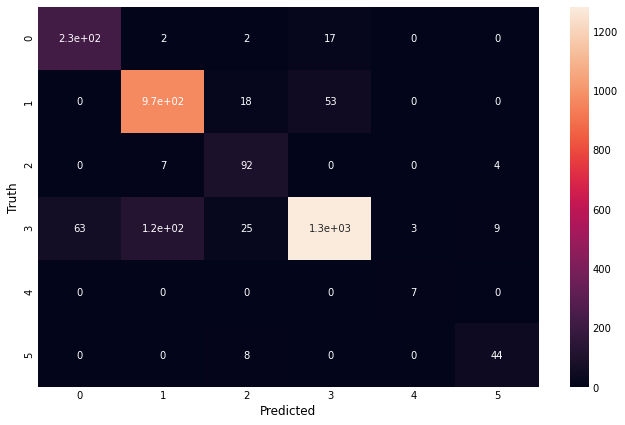

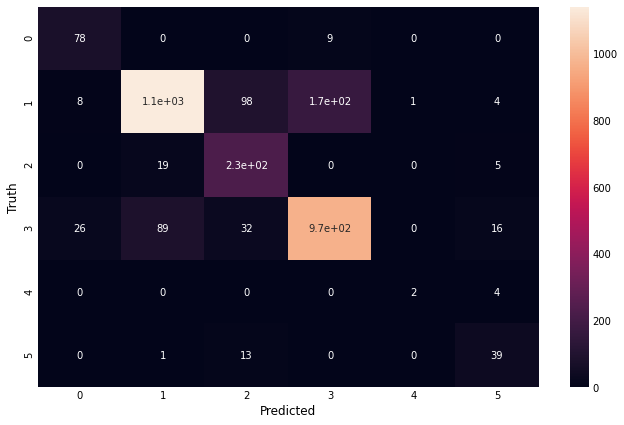

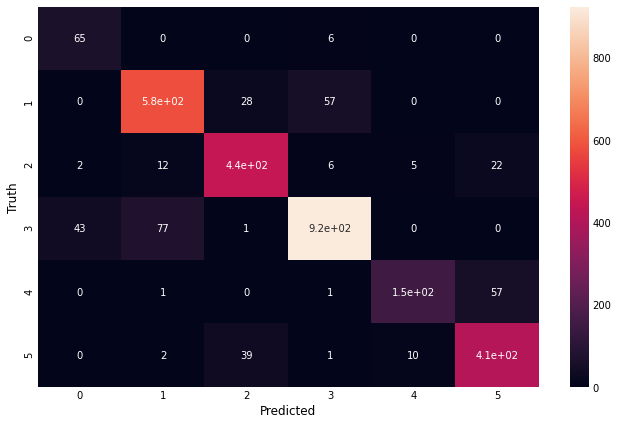

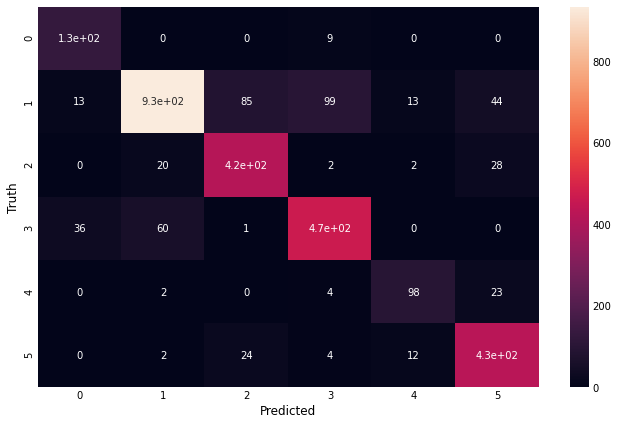

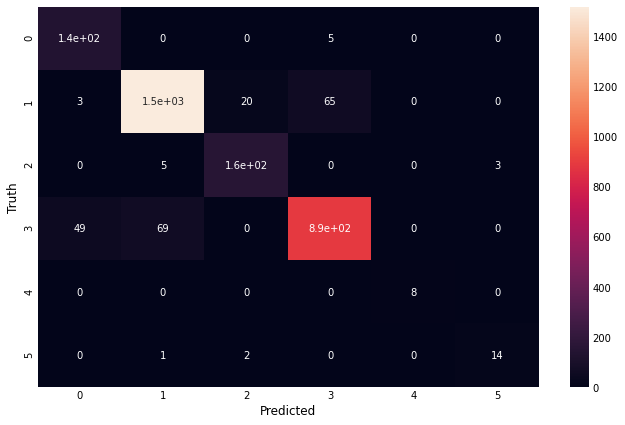

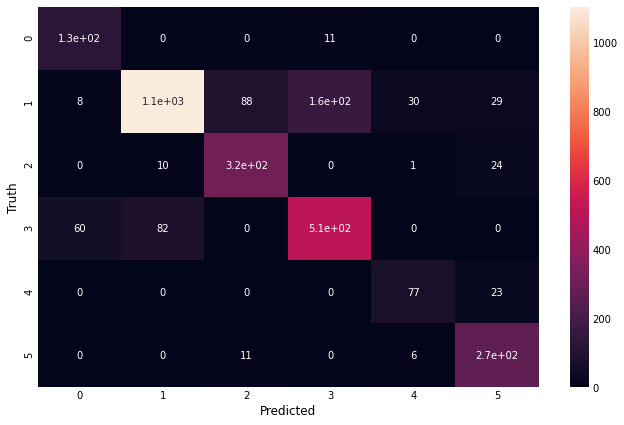

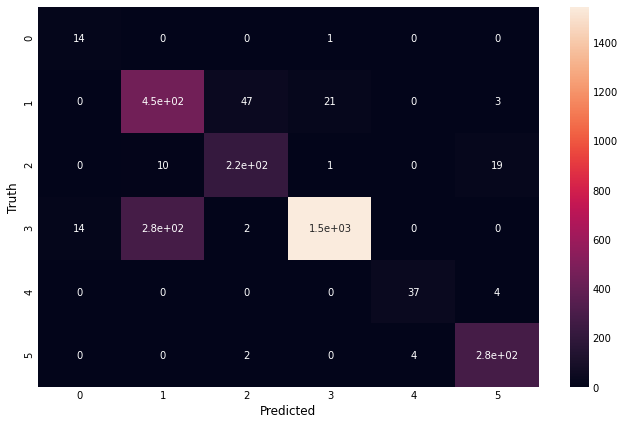

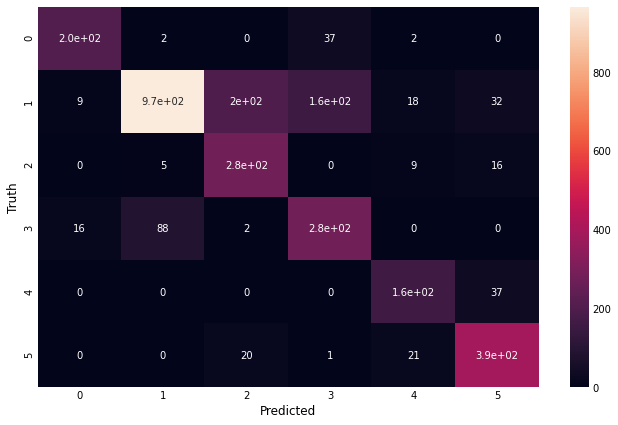

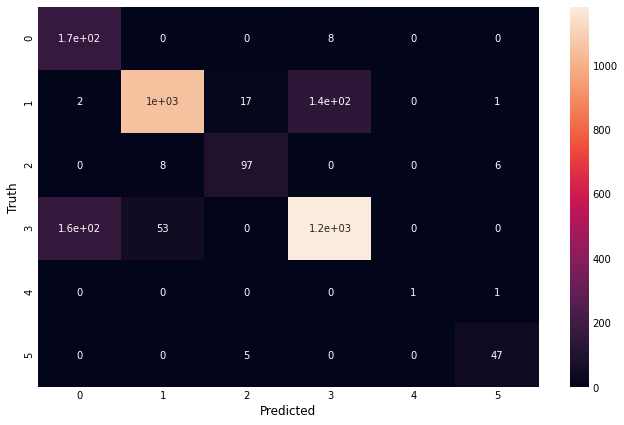

In [ ]:
kf = KFold(n_splits=10)
accuracy = []
precision = []
recall = []
precision_avg = []
recall_avg = []

for train_index, test_index in kf.split(X, Y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]    
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
    Xtrain, ytrain = os.fit_resample(X1_train, Y1_train)
    knn_classifier_1.fit(Xtrain, ytrain)
    ypred = knn_classifier_1.predict(X1_test)
    accuracy.append(accuracy_score(Y1_test, ypred))
    precision.append(precision_score(Y1_test, ypred,average=None))
    recall.append(recall_score(Y1_test, ypred,average=None))
    precision_avg.append(precision_score(Y1_test, ypred,average='macro'))
    recall_avg.append(recall_score(Y1_test, ypred,average='macro'))
    print(classification_report(Y1_test, ypred))
    
    cmrfs = confusion_matrix(Y1_test, ypred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cmrfs, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    

In [ ]:
precision

[array([0.68379447, 0.73757455, 0.3916185 , 0.94026549, 1.        ,
        0.32544379]),
 array([0.78275862, 0.88160291, 0.63448276, 0.94826312, 0.7       ,
        0.77192982]),
 array([0.69642857, 0.9128    , 0.61662198, 0.84568439, 0.66666667,
        0.57352941]),
 array([0.59090909, 0.86390533, 0.86744639, 0.92864322, 0.9112426 ,
        0.83877551]),
 array([0.72316384, 0.91748527, 0.79087452, 0.79863481, 0.784     ,
        0.81765835]),
 array([0.72916667, 0.95294856, 0.87640449, 0.92738589, 1.        ,
        0.82352941]),
 array([0.65482234, 0.92301255, 0.76086957, 0.74415205, 0.6754386 ,
        0.78223496]),
 array([0.5       , 0.60893099, 0.81318681, 0.98533163, 0.90243902,
        0.91447368]),
 array([0.89130435, 0.91046183, 0.56175299, 0.58860759, 0.76076555,
        0.82180294]),
 array([0.51327434, 0.94504505, 0.81512605, 0.88863807, 1.        ,
        0.85454545])]

In [ ]:
recall

[array([0.97740113, 0.89830508, 0.95087719, 0.78413284, 0.4166032 ,
        0.73660714]),
 array([0.91532258, 0.93166506, 0.89320388, 0.85305851, 1.        ,
        0.84615385]),
 array([0.89655172, 0.80352113, 0.90551181, 0.85613416, 0.33333333,
        0.73584906]),
 array([0.91549296, 0.87294469, 0.90447154, 0.88421053, 0.72300469,
        0.88768898]),
 array([0.93430657, 0.78619529, 0.88888889, 0.82831858, 0.77165354,
        0.91025641]),
 array([0.96551724, 0.94523958, 0.95121951, 0.88339921, 1.        ,
        0.82352941]),
 array([0.92142857, 0.77566807, 0.9       , 0.78187404, 0.77      ,
        0.94137931]),
 array([0.93333333, 0.86372361, 0.88095238, 0.83967391, 0.90243902,
        0.97887324]),
 array([0.83333333, 0.7       , 0.90384615, 0.72467532, 0.81122449,
        0.90322581]),
 array([0.95604396, 0.86765922, 0.87387387, 0.84538296, 0.5       ,
        0.90384615])]

In [ ]:
precision_avg

[0.6797827983174662,
 0.7865062062093956,
 0.718621837974274,
 0.8334870233249735,
 0.8053027988939294,
 0.8849058370031102,
 0.7567550088064897,
 0.7873936903770041,
 0.7557825407540056,
 0.8361048266722512]

In [ ]:
recall_avg

[0.7939877651064492,
 0.9065673139154341,
 0.7551502014940424,
 0.8646355670111836,
 0.8532698803435891,
 0.92815082527943,
 0.8483916658080637,
 0.8998325832668924,
 0.812717518017057,
 0.824467694959186]

In [ ]:
accuracy

[0.6607989167230873,
 0.887571960717914,
 0.833051134439553,
 0.8747036911615307,
 0.836437521164917,
 0.9248222146969184,
 0.8147646461225873,
 0.8621740602776837,
 0.7731120894006096,
 0.8631899762952929]